# Secom Dosyası Üzerinden İşlemler

**Data Manipulasyonu yapılacak**

_Let's Begin_


\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)


In [48]:
import scipy.stats as stats


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/home/elci/predy/PredY/secom/data/Secom_csv.csv") 

In [3]:
df.head(10)

,Unnamed: 0,Fail,Tarih,X1,X2,X3,X4,X5,X6,X7,...,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590
0,1,0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2,0,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,0,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,0,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,6,0,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,7,0,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,8,0,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,9,0,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,10,0,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [4]:
df.describe()

,Unnamed: 0,Fail,X1,X2,X3,X4,X5,X6,X7,X8,...,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590
count,1567.00000,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,784.00000,0.066369,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,452.49825,0.249005,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,1.00000,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,392.50000,0.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,784.00000,0.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,1175.50000,0.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1567.00000,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [5]:
df['Fail'].value_counts()

0    1463
1     104
Name: Fail, dtype: int64

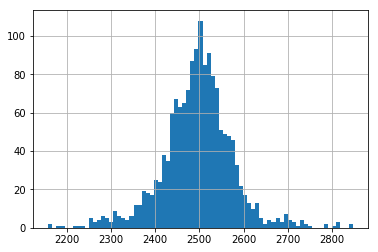

In [6]:
df['X2'].hist(bins=75)

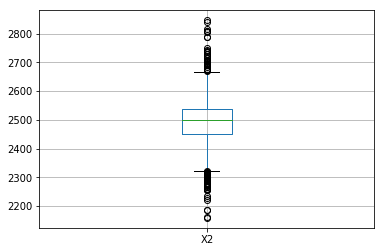

In [7]:
df.boxplot(column='X2')

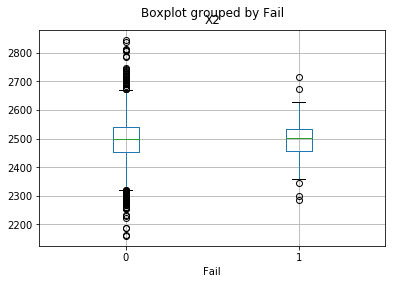

In [8]:
df.boxplot(column='X2', by = 'Fail')

In [9]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0      0
Fail            0
Tarih           0
X1              6
X2              7
X3             14
X4             14
X5             14
X6             14
X7             14
X8              9
X9              2
X10             2
X11             2
X12             2
X13             2
X14             3
X15             3
X16             3
X17             3
X18             3
X19             3
X20            10
X21             0
X22             2
X23             2
X24             2
X25             2
X26             2
X27             2
             ... 
X561            1
X562            1
X563          273
X564          273
X565          273
X566          273
X567          273
X568          273
X569          273
X570          273
X571            0
X572            0
X573            0
X574            0
X575            0
X576            0
X577            0
X578            0
X579          949
X580          949
X581          949
X582          949
X583            1
X584            1
X585      

In [10]:
len(df.columns)

593

In [11]:
count = 0
n=1
threshold_value=250

In [12]:
dff=df

**Threshold sayısından daha az NA içeren parametreler tutulduğu fonksiyon**

In [13]:
try:

    while (count < len(df.columns)-n-1):
        sys.stdout.write("-")
        if (dff.apply(lambda x: sum(x.isnull()),axis=0)[count] > threshold_value):
            print ("\n",count+n-1,'.değişken atıldı  ',"içerdiği na sayısı=",dff.apply(lambda x: sum(x.isnull()),axis=0)[count],"    toplamda atılan değişken sayısı=",n)
            dff=dff.drop(dff.columns[count],axis=1)
            n=n+1           
            count-= 1
        count= count + 1
except:
    print("out of bound ")    


----------------------------------------------------------------------------
 75 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 1
-
 76 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 2
------------
 88 .değişken atıldı   içerdiği na sayısı= 1341     toplamda atılan değişken sayısı= 3
------------------------
 112 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 4
-
 113 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 5
-
 114 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 6
-
 115 .değişken atıldı   içerdiği na sayısı= 715     toplamda atılan değişken sayısı= 7
---------------------------------------------
 160 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 8
-
 161 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 9
-------------------------------------------

In [14]:
count

539

In [15]:
dff.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0     0
Fail           0
Tarih          0
X1             6
X2             7
X3            14
X4            14
X5            14
X6            14
X7            14
X8             9
X9             2
X10            2
X11            2
X12            2
X13            2
X14            3
X15            3
X16            3
X17            3
X18            3
X19            3
X20           10
X21            0
X22            2
X23            2
X24            2
X25            2
X26            2
X27            2
              ..
X537           9
X538           9
X539           9
X540           8
X541           8
X542           8
X543           2
X544           2
X545           2
X546           2
X559           1
X560           1
X561           1
X562           1
X571           0
X572           0
X573           0
X574           0
X575           0
X576           0
X577           0
X578           0
X583           1
X584           1
X585           1
X586           1
X587           1
X588          

In [16]:
dff

,Unnamed: 0,Fail,Tarih,X1,X2,X3,X4,X5,X6,X7,...,X577,X578,X583,X584,X585,X586,X587,X588,X589,X590
0,1,0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2,0,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,0,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,0,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,6,0,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,7,0,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1958,8.3645,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,8,0,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,...,56.4274,16.0862,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,9,0,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,...,1.3248,14.2892,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,10,0,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.6636,7.4181,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


**Değişken tipi için**
**Parametrelerin rölatif unique değerleri hesaplanıyor**

**THRESHOLD Gerekli**

In [17]:
i=2
Threshold=0

In [18]:
dropped=dff.dropna()
dropped

,Unnamed: 0,Fail,Tarih,X1,X2,X3,X4,X5,X6,X7,...,X577,X578,X583,X584,X585,X586,X587,X588,X589,X590
1,2,0,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,0,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,0,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,6,0,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,7,0,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1958,8.3645,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,8,0,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,...,56.4274,16.0862,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,9,0,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,...,1.3248,14.2892,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,10,0,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.6636,7.4181,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294
10,11,1,2008-07-19 21:57:00,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,...,1.7983,14.5507,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122


In [19]:
a=[dropped.columns]
a[0]

Index(['Unnamed: 0', 'Fail', 'Tarih', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       ...
       'X577', 'X578', 'X583', 'X584', 'X585', 'X586', 'X587', 'X588', 'X589',
       'X590'],
      dtype='object', length=541)

In [20]:
dictionary={}
dictionary

{}

In [21]:
for i in range(0,len(dropped.columns)):
    dictionary[a[0][i]]=len(set(dropped.iloc[:,i]))/len(dropped.iloc[:,i])


In [22]:
for k, v in dictionary.items():
    print (k + ' rölatif frekansı= ' + str(v))

Unnamed: 0 rölatif frekansı= 1.0
Fail rölatif frekansı= 0.0014357501794687725
Tarih rölatif frekansı= 0.9827709978463748
X1 rölatif frekansı= 0.9763101220387652
X2 rölatif frekansı= 0.9698492462311558
X3 rölatif frekansı= 0.34673366834170855
X4 rölatif frekansı= 0.3539124192390524
X5 rölatif frekansı= 0.3431442928930366
X6 rölatif frekansı= 0.0007178750897343862
X7 rölatif frekansı= 0.34816941852117733
X8 rölatif frekansı= 0.06317300789662599
X9 rölatif frekansı= 0.791816223977028
X10 rölatif frekansı= 0.3912419239052405
X11 rölatif frekansı= 0.2742282842785355
X12 rölatif frekansı= 0.26776740847092606
X13 rölatif frekansı= 0.9913854989231874
X14 rölatif frekansı= 0.0007178750897343862
X15 rölatif frekansı= 0.9956927494615937
X16 rölatif frekansı= 0.9985642498205313
X17 rölatif frekansı= 0.9526202440775305
X18 rölatif frekansı= 0.19885139985642497
X19 rölatif frekansı= 0.9921033740129217
X20 rölatif frekansı= 0.24192390524048815
X21 rölatif frekansı= 0.3840631730078966
X22 rölatif frek

In [23]:
threshold_rolative=0.20

**Rölatif Frekansı Threshold Değerinden Küçük Olan Her Sütunu Bastır.**

In [24]:
for k, v in dictionary.items():
    if v<threshold_rolative:
        print(dropped[k])

1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      1
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
22      0
23      1
24      0
25      0
27      0
28      0
29      0
30      0
31      0
32      0
34      0
       ..
1491    0
1493    0
1494    0
1496    0
1497    0
1503    0
1506    0
1509    0
1511    0
1514    0
1517    0
1518    0
1519    1
1520    0
1521    0
1523    0
1524    0
1525    0
1526    0
1529    0
1531    0
1532    0
1533    0
1535    0
1536    0
1537    0
1539    0
1540    0
1541    0
1550    0
Name: Fail, Length: 1393, dtype: int64
1       100.0
2       100.0
3       100.0
4       100.0
5       100.0
6       100.0
7       100.0
8       100.0
9       100.0
10      100.0
11      100.0
12      100.0
13      100.0
14      100.0
15      100.0
16      100.0
17      100.0
18      100.0
19      100.0
22      100.0
23      100.0
24      100.0
25      100.0
27      100.0
28      100.0
2

1       0.9985
2       0.9978
3       0.9961
4       1.0010
5       0.9985
6       0.9966
7       0.9951
8       0.9951
9       0.9951
10      1.0010
11      0.9992
12      0.9966
13      0.9971
14      0.9971
15      1.0000
16      1.0000
17      1.0000
18      0.9997
19      0.9997
22      0.9967
23      0.9949
24      0.9998
25      0.9963
27      0.9992
28      0.9963
29      0.9982
30      0.9992
31      0.9963
32      1.0020
34      0.9982
         ...  
1491    0.9991
1493    0.9976
1494    0.9991
1496    0.9991
1497    0.9991
1503    0.9987
1506    0.9987
1509    0.9975
1511    1.0010
1514    1.0010
1517    0.9965
1518    0.9964
1519    1.0000
1520    0.9965
1521    0.9987
1523    0.9975
1524    0.9979
1525    0.9979
1526    0.9979
1529    0.9985
1531    0.9965
1532    0.9957
1533    0.9973
1535    0.9973
1536    0.9973
1537    0.9957
1539    0.9973
1540    0.9973
1541    0.9973
1550    0.9957
Name: X132, Length: 1393, dtype: float64
1        98.0
2        89.0
3       127.0
4 

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
22      0.0
23      0.0
24      0.0
25      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
34      0.0
       ... 
1491    0.0
1493    0.0
1494    0.0
1496    0.0
1497    0.0
1503    0.0
1506    0.0
1509    0.0
1511    0.0
1514    0.0
1517    0.0
1518    0.0
1519    0.0
1520    0.0
1521    0.0
1523    0.0
1524    0.0
1525    0.0
1526    0.0
1529    0.0
1531    0.0
1532    0.0
1533    0.0
1535    0.0
1536    0.0
1537    0.0
1539    0.0
1540    0.0
1541    0.0
1550    0.0
Name: X381, Length: 1393, dtype: float64
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0

Name: X546, Length: 1393, dtype: float64
1       0.5019
2       0.4958
3       0.4990
4       0.4800
5       0.4949
6       0.5010
7       0.4984
8       0.4993
9       0.4967
10      0.4925
11      0.4987
12      0.4950
13      0.5034
14      0.5077
15      0.5058
16      0.5005
17      0.5015
18      0.4948
19      0.5036
22      0.4977
23      0.4982
24      0.5032
25      0.5012
27      0.5069
28      0.5036
29      0.5019
30      0.4981
31      0.5033
32      0.4967
34      0.5037
         ...  
1491    0.4991
1493    0.5045
1494    0.5029
1496    0.4950
1497    0.4985
1503    0.5028
1506    0.4997
1509    0.5051
1511    0.5019
1514    0.4966
1517    0.4992
1518    0.4998
1519    0.4979
1520    0.5011
1521    0.5007
1523    0.4995
1524    0.5037
1525    0.5003
1526    0.4982
1529    0.4964
1531    0.5000
1532    0.5007
1533    0.4995
1535    0.4972
1536    0.5023
1537    0.4942
1539    0.4987
1540    0.5011
1541    0.5021
1550    0.5034
Name: X583, Length: 1393, dtype: float64
1  

In [25]:
for k, v in dictionary.items():
    if v<threshold_rolative:
        dropped[k]=dropped[k].astype('category')

/home/elci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
kategorik_değişkenli_data=dropped.select_dtypes(include=['category'])

In [27]:
float_degiskenli_data=dropped.select_dtypes(include=['float'])

In [28]:
print("kategorik degisken sayısı=",len(kategorik_değişkenli_data.columns),"\nfloat degisken sayısı=",len(float_degiskenli_data.columns),"\nToplam eğişken sayısı=",len(dropped.columns))

kategorik degisken sayısı= 208 
float degisken sayısı= 331 
Toplam eğişken sayısı= 541


In [29]:
hedef_fail=kategorik_değişkenli_data.iloc[:,0]

In [30]:
kategorik_değişkenli_data.drop(["Fail"],axis=1)

,X6,X8,X14,X18,X30,X41,X43,X50,X53,X54,...,X539,X543,X544,X545,X546,X583,X584,X585,X588,X589
1,100.0,0.1247,0.0,0.9701,2.2667,78.250,70.0,1.0,0.0,4.590,...,0.0,0.1096,0.0078,0.0026,7.1160,0.5019,0.0223,0.0055,0.0201,0.0060
2,100.0,0.1241,0.0,0.9674,2.3333,14.370,70.0,1.0,0.0,4.486,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4958,0.0157,0.0039,0.0484,0.0148
3,100.0,0.1217,0.0,0.9687,2.6444,76.900,70.0,1.0,0.0,4.486,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4990,0.0103,0.0025,0.0149,0.0044
4,100.0,0.1235,0.0,0.9735,3.1556,76.390,70.0,1.0,0.0,4.624,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4800,0.4766,0.1045,0.0149,0.0044
5,100.0,0.1235,0.0,0.9747,1.6333,59.940,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4949,0.0189,0.0044,0.0151,0.0052
6,100.0,0.1247,0.0,0.9667,2.4889,74.460,70.0,1.0,0.0,4.590,...,0.0,0.1096,0.0078,0.0026,7.1160,0.5010,0.0143,0.0042,0.0151,0.0052
7,100.0,0.1185,0.0,0.9687,2.7889,78.090,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4984,0.0106,0.0034,0.0194,0.0063
8,100.0,0.1185,0.0,0.9693,2.1444,61.100,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4993,0.0172,0.0046,0.0124,0.0045
9,100.0,0.1185,0.0,0.9667,2.3778,78.090,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4967,0.0152,0.0038,0.0191,0.0073
10,100.0,0.1223,0.0,0.9664,1.9444,14.370,70.0,1.0,0.0,4.647,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4925,0.0158,0.0041,0.0205,0.0071


In [31]:
float_degiskenli_data

,X1,X2,X3,X4,X5,X7,X9,X10,X11,X12,...,X572,X573,X574,X575,X576,X577,X578,X586,X587,X590
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,1.4966,-0.0005,-0.0148,0.9627,...,2.4335,5.9200,0.2653,2.0111,0.0772,1.1065,10.9003,4.4447,0.0096,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,1.4436,0.0041,0.0013,0.9615,...,2.0293,11.2100,0.1882,4.0923,0.0640,2.0952,9.2721,3.1745,0.0584,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,1.4882,-0.0124,-0.0033,0.9629,...,2.0253,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,2.0544,0.0202,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1.5031,-0.0031,-0.0072,0.9569,...,2.0275,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,99.3032,0.0202,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,1.5287,0.0167,0.0055,0.9699,...,2.3236,8.9100,0.3201,2.2598,0.0899,1.6679,13.7755,3.8276,0.0342,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,1.5816,-0.0270,0.0105,0.9591,...,2.4229,6.4800,0.2027,2.2019,0.0597,1.1958,8.3645,2.8515,0.0342,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,1.5153,0.0157,0.0007,0.9481,...,2.2008,278.1900,0.3540,92.5866,0.1260,56.4274,16.0862,2.1261,0.0204,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,1.5358,0.0111,-0.0066,0.9494,...,2.2170,7.0900,0.3168,2.4902,0.0878,1.3248,14.2892,3.4456,0.0111,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,1.5381,0.0159,0.0049,0.9440,...,2.2598,3.5400,0.1676,1.0395,0.0485,0.6636,7.4181,3.0687,0.0212,90.2294
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,103.3400,1.5144,-0.0190,0.0013,0.9433,...,1.8715,9.5699,0.2723,3.3618,0.0862,1.7983,14.5507,3.2115,0.0355,57.8122


In [130]:
x=float_degiskenli_data
x = StandardScaler().fit_transform(x)


In [131]:
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00071839e+00 -1.43909690e-01 -6.44387021e-03 ...  2.72612568e-02
   2.58962934e-02  8.45626882e-03]
 [-1.43909690e-01  1.00071839e+00  1.35428163e-02 ... -9.45413533e-04
  -5.27984298e-03  4.25179899e-02]
 [-6.44387021e-03  1.35428163e-02  1.00071839e+00 ...  1.92759740e-02
  -2.88345190e-02 -3.31701813e-02]
 ...
 [ 2.72612568e-02 -9.45413533e-04  1.92759740e-02 ...  1.00071839e+00
   2.26770079e-03 -5.25584911e-03]
 [ 2.58962934e-02 -5.27984298e-03 -2.88345190e-02 ...  2.26770079e-03
   1.00071839e+00 -4.80866908e-01]
 [ 8.45626882e-03  4.25179899e-02 -3.31701813e-02 ... -5.25584911e-03
  -4.80866908e-01  1.00071839e+00]]


In [132]:
print('NumPy covariance matrix: \n%s' %np.cov(x.T))

NumPy covariance matrix: 
[[ 1.00071839e+00 -1.43909690e-01 -6.44387021e-03 ...  2.72612568e-02
   2.58962934e-02  8.45626882e-03]
 [-1.43909690e-01  1.00071839e+00  1.35428163e-02 ... -9.45413533e-04
  -5.27984298e-03  4.25179899e-02]
 [-6.44387021e-03  1.35428163e-02  1.00071839e+00 ...  1.92759740e-02
  -2.88345190e-02 -3.31701813e-02]
 ...
 [ 2.72612568e-02 -9.45413533e-04  1.92759740e-02 ...  1.00071839e+00
   2.26770079e-03 -5.25584911e-03]
 [ 2.58962934e-02 -5.27984298e-03 -2.88345190e-02 ...  2.26770079e-03
   1.00071839e+00 -4.80866908e-01]
 [ 8.45626882e-03  4.25179899e-02 -3.31701813e-02 ... -5.25584911e-03
  -4.80866908e-01  1.00071839e+00]]


In [133]:
cov_mat = np.cov(x.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-7.04387491e-03  2.53413527e-02 -5.31026090e-03 ...  2.15203665e-06
   1.04158752e-06 -9.89311769e-09]
 [ 1.09248525e-03 -1.25549883e-02 -2.19953186e-03 ...  1.56978440e-06
   1.45298595e-06 -1.31988840e-06]
 [-4.31150740e-03 -6.54239546e-03  1.58558222e-03 ... -7.14847442e-07
   1.31102510e-06  9.94337049e-06]
 ...
 [ 3.48345690e-03 -5.54681614e-03  1.90678815e-03 ...  3.36720145e-08
  -2.17883760e-07 -1.07389581e-06]
 [-7.07675006e-03  1.95282940e-02 -2.09639155e-02 ...  2.78439855e-07
  -3.06670992e-07 -1.51147646e-06]
 [ 1.52885566e-02 -1.64281625e-02 -4.91237837e-03 ... -4.05806719e-08
   6.50064454e-07 -4.40870353e-06]]

Eigenvalues 
[2.44110787e+01 1.45312334e+01 1.20559322e+01 9.91068763e+00
 8.70161405e+00 7.42081513e+00 6.85259898e+00 6.43772288e+00
 6.30645416e+00 5.71758881e+00 5.54178991e+00 5.17321663e+00
 5.19094953e+00 4.73606673e+00 4.41744689e+00 4.35282610e+00
 4.25403037e+00 4.21670483e+00 3.88172168e+00 3.66815201e+00
 3.62254591e+00 3.45973653e+00 

In [134]:
u,s,v = np.linalg.svd(x.T)
u



array([[-7.04387491e-03,  2.53413527e-02, -5.31026090e-03, ...,
         1.04158770e-06,  2.15203700e-06,  3.94634618e-07],
       [ 1.09248525e-03, -1.25549883e-02, -2.19953186e-03, ...,
         1.45298535e-06,  1.56978361e-06,  4.25867087e-08],
       [-4.31150740e-03, -6.54239546e-03,  1.58558222e-03, ...,
         1.31103060e-06, -7.14852789e-07,  5.04550199e-07],
       ...,
       [ 3.48345690e-03, -5.54681614e-03,  1.90678815e-03, ...,
        -2.17883881e-07,  3.36728050e-08, -1.94954874e-09],
       [-7.07675006e-03,  1.95282940e-02, -2.09639155e-02, ...,
        -3.06670878e-07,  2.78441411e-07,  1.08442590e-07],
       [ 1.52885566e-02, -1.64281625e-02, -4.91237837e-03, ...,
         6.50064402e-07, -4.05787149e-08,  1.04249261e-07]])

In [135]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))



In [136]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
24.411078710985088
14.53123337279197
12.05593223218983
9.910687631282377
8.701614046255914
7.42081513406886
6.8525989768023745
6.4377228783131555
6.306454159562874
5.717588808306663
5.541789909232943
5.190949532428052
5.17321662880775
4.736066725448625
4.417446889413619
4.35282610236129
4.2540303741212
4.21670483119413
3.8817216812913977
3.6681520099177765
3.6225459142037395
3.4777420483947683
3.459736534873851
3.402166555097836
3.3562014615854485
3.225229451884284
3.1783459405147814
3.135993486994339
3.114861341087967
3.1034457982685946
2.936613947172628
2.9215117072879426
2.897213252777291
2.824255062340194
2.785369684276719
2.6855201460829794
2.628848350479663
2.588454383693514
2.449603108871567
2.4066387521139734
2.3873361904407018
2.347753427711655
2.291439238895502
2.2559625965811145
2.124992481011627
2.1080249798569795
2.080168925973566
2.0400919156259274
1.990590712654307
1.9251775949084067
1.8908864829589527
1.8428258444742194
1.810499443508892

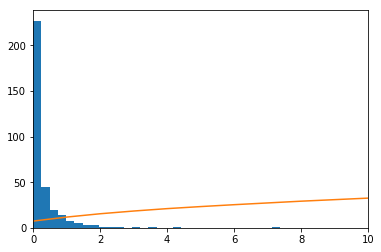

In [137]:
plt.xlim(0,10)
plt.hist(var_exp, bins=30)  
plt.plot(cum_var_exp)

plt.show()

In [138]:
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents          )
principalDf

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-2.228632,-0.225464,1.054382,-1.753243,1.523297,-3.733240,-0.572675,3.242450,-1.505598,1.422706,...,0.603681,-4.398411,2.266481,-0.604240,0.513518,1.493735,-1.209899,-0.598461,-1.520906,0.666919
1,0.198572,-0.418482,0.747088,-0.598160,-1.458899,-2.086462,0.798316,1.696278,-1.146098,0.372827,...,1.799052,-0.728469,4.108555,-2.347633,2.225656,-1.564689,-1.523009,0.960320,1.670481,1.606011
2,0.880659,1.172884,1.720805,-2.145648,-1.123796,-3.929807,-0.632190,1.147061,1.030535,-1.138690,...,2.185867,-0.536980,1.138007,-1.863443,3.073361,0.090384,-1.830090,1.448424,1.372688,-1.589732
3,0.779676,1.612254,1.977475,-0.870853,-2.517369,-4.278175,2.682862,-2.503872,3.912380,-0.656254,...,1.477818,1.983292,0.984680,-0.535966,1.088495,0.259300,-4.344717,1.038105,-0.902775,0.205699
4,2.319189,2.361917,2.076543,-3.027599,-4.306176,-1.130203,2.982352,-0.913691,0.662728,-0.708391,...,0.706810,1.496885,1.610311,-1.628790,-0.523197,-1.323167,-1.407968,-1.813000,1.308994,0.389080
5,-1.659593,4.044845,1.493908,-2.241329,0.558799,-5.284427,-1.579829,0.964753,0.191948,0.548640,...,-0.048190,0.858874,-1.949560,1.010472,-0.976797,-1.293340,-1.574506,0.898964,-0.960629,0.248721
6,1.567517,0.890098,2.831540,-3.484469,-2.054577,-1.488948,4.296664,-0.177493,0.444232,5.202310,...,2.675198,-1.991695,-1.460326,-3.264771,2.400264,0.232276,0.150055,0.948172,0.166924,-3.273278
7,0.210908,18.231097,-0.602484,2.092114,-1.846399,-0.672908,5.446644,-1.350168,-1.622268,0.050482,...,0.818814,0.903680,3.132076,-2.399916,-1.247687,-0.177474,0.002747,-3.285741,-0.195887,-0.406927
8,1.608993,3.174716,3.412744,-4.970696,-3.448925,-1.546256,4.856956,2.997730,1.175295,2.180173,...,1.256830,-0.627948,1.298750,-2.483833,0.740561,-0.963988,-0.562022,-1.050175,1.836390,-1.227821
9,-1.504853,22.338701,-2.048763,4.606093,2.909749,2.902295,2.459599,-0.230784,-4.349734,0.038539,...,-1.127102,-0.316297,1.462208,-3.822401,4.538692,-2.434485,-3.185838,-4.049718,2.404325,-3.932201


In [139]:
hedef_fail=hedef_fail.reset_index(drop=True)

In [140]:
finalDf = pd.concat([principalDf,hedef_fail], axis = 1)

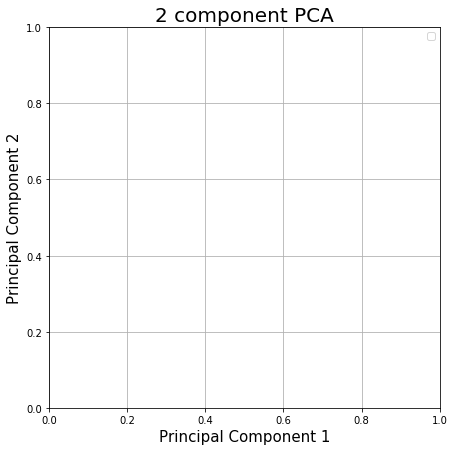

In [141]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['0', '1']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Fail'] == target
  #  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
   #            , finalDf.loc[indicesToKeep, 'principal component 2']
    #           , c = color
     #          , s = 5)
ax.legend(targets)
ax.grid()


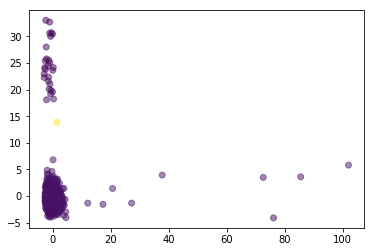

In [142]:
N = 50
x = finalDf.iloc[:,0]
y = finalDf.iloc[:,1]
colors = finalDf.iloc[:,2]

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [143]:
a=pca.explained_variance_ratio_

In [144]:
np.sum(a)

0.49815689688037584